In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Student Performance new.csv")
data.head()

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M


In [4]:
data.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [79]:
box_data = data[['math percentage', 'reading score percentage', 'writing score percentage']]
box_data.shape

(1000, 3)

# Removing Outliers

## Boundary (Upper and Lower) for score percentage

### Math Percentage
Lower: 0.27
Upper: 1.07

### Reading Percentage
Lower: 0.29
Upper: 1.09

### Writing Percentage
Lower: 0.25875
Upper: 1.10875

In [80]:
num_var = data.select_dtypes([np.number]).columns[1:]

m_upper = 1.07
m_lower = 0.27
r_upper = 1.09
r_lower = 0.29
w_lower = 0.25875
w_upper = 1.10875

c_data = box_data.copy()
for x in num_var:
    if x == "math percentage":
        box_data.drop(box_data[box_data[x] <= m_lower].index, inplace=True)
        box_data.drop(box_data[box_data[x] >= m_upper].index, inplace=True)
    elif x == "reading score percentage":
        box_data.drop(box_data[box_data[x] <= r_lower].index, inplace=True)
        box_data.drop(box_data[box_data[x] >= r_upper].index, inplace=True)
    else:
        box_data.drop(box_data[box_data[x] <= w_lower].index, inplace=True)
        box_data.drop(box_data[box_data[x] >= w_upper].index, inplace=True)

box_data

,math percentage,reading score percentage,writing score percentage
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75
...,...,...,...
995,0.88,0.99,0.95
996,0.62,0.55,0.55
997,0.59,0.71,0.65
998,0.68,0.78,0.77


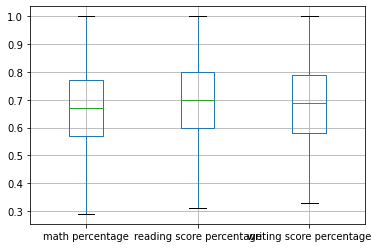

In [87]:
box_data.boxplot()
plt.savefig("C:\\Users\\lim95\\Documents\\GitHub\\student_performance_r_project\\Scores\\wo_outliers_boxplot.jpeg")

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [98]:
data.head()

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M


In [101]:
def overall(row):
   return (row['math percentage'] + row['reading score percentage'] + row['writing score percentage'])/3

c_data = data.copy()
c_data['overall score'] = c_data.apply (lambda row: overall(row), axis=1)
    
c_data.head()

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex,overall score
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0.726667
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F,0.823333
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0.926667
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,0.493333
4,4,group C,some college,standard,none,0.76,0.78,0.75,M,0.763333


In [144]:
X = c_data.drop(['Unnamed: 0','math percentage', 'reading score percentage', 'writing score percentage', 'overall score'], axis=1)
y = round(c_data['overall score'] * 100, 1).apply(int)

In [145]:
features = X.columns


for a in features:
    if a == 'race/ethnicity':
        d = pd.get_dummies(X[a], prefix='r')
        X = pd.concat([X,d], axis=1)
        del X[a]
    elif a == 'parental level of education':
        d = pd.get_dummies(X[a], prefix='ed')
        X = pd.concat([X,d], axis=1)
        del X[a]
    elif a == 'lunch':
        d = pd.get_dummies(X[a], prefix='l')
        X = pd.concat([X,d], axis=1)
        del X[a]
    elif a == 'test preparation course':
        d = pd.get_dummies(X[a], prefix='tp')
        X = pd.concat([X,d], axis=1)
        del X[a]
    else:
        d = pd.get_dummies(X[a], prefix='g')
        X = pd.concat([X,d], axis=1)
        del X[a]

X.head()

,r_group A,r_group B,r_group C,r_group D,r_group E,ed_associate's degree,ed_bachelor's degree,ed_high school,ed_master's degree,ed_some college,ed_some high school,l_free/reduced,l_standard,tp_completed,tp_none,g_F,g_M
0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [159]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = mean_absolute_error(pred1, y_test)
print(acc1)

10.110625


In [162]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
pred2= model2.predict(X_test)
acc2 = mean_absolute_error(pred2, y_test)
print(acc2)

11.3272085423918


In [163]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
pred3= model3.predict(X_test)
acc3 = mean_absolute_error(pred3, y_test)
print(acc3)

11.786123136123136


In [165]:
model4= KNeighborsRegressor()
model4.fit(X_train, y_train)
pred4= model4.predict(X_test)
acc4 = mean_absolute_error(pred4, y_test)
print(acc4)

10.516


In [166]:
model5 = SVR()
model5.fit(X_train, y_train)
pred5= model5.predict(X_test)
acc5 = mean_absolute_error(pred5, y_test)
print(acc5)

10.050718775762405
